In [2]:
import tensorflow as tf

In [11]:
train=r"/home/teaching/Atmega_MIC/DP Students/Abhay/cropwise_data/corn"
training_set = tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 34917 files belonging to 6 classes.


In [12]:
classes = training_set.class_names
classes

['corn_blight',
 'corn_common_rust',
 'corn_diseased',
 'corn_gray_leaf_spot',
 'corn_healthy',
 'corn_northern_leaf_blight']

In [13]:
total_batches = tf.data.experimental.cardinality(training_set).numpy()
train_size = int(0.8 * total_batches)
val_size = total_batches - train_size

train_dataset = training_set.take(train_size)
val_dataset = training_set.skip(train_size)
print(len(training_set))
print(len(train_dataset))
print(len(val_dataset))

1092
873
219


In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # 6 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [16]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras import Sequential

preprocessing = Sequential([
    Rescaling(1./255),
    RandomFlip("horizontal"),
    RandomRotation(0.1)
])

train_ds = train_dataset.map(lambda x, y: (preprocessing(x), y))
val_ds = val_dataset.map(lambda x, y: (x / 255.0, y))


In [17]:
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-6)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/10
590/873 [===================>..........] - ETA: 49s - loss: 0.4100 - categorical_accuracy: 0.8659

Invalid SOS parameters for sequential JPEG


810/873 [==========================>...] - ETA: 11s - loss: 0.3681 - categorical_accuracy: 0.8801

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.3593 - categorical_accuracy: 0.8830

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 498s 569ms/step - loss: 0.3593 - categorical_accuracy: 0.8830 - val_loss: 0.2533 - val_categorical_accuracy: 0.9182 - lr: 1.0000e-04
Epoch 2/10
589/873 [===================>..........] - ETA: 1:13 - loss: 0.2153 - categorical_accuracy: 0.9293

Invalid SOS parameters for sequential JPEG


809/873 [==========================>...] - ETA: 16s - loss: 0.2119 - categorical_accuracy: 0.9306

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.2126 - categorical_accuracy: 0.9303

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 327s 374ms/step - loss: 0.2126 - categorical_accuracy: 0.9303 - val_loss: 0.2208 - val_categorical_accuracy: 0.9297 - lr: 1.0000e-04
Epoch 3/10
589/873 [===================>..........] - ETA: 1:15 - loss: 0.1812 - categorical_accuracy: 0.9397

Invalid SOS parameters for sequential JPEG


809/873 [==========================>...] - ETA: 16s - loss: 0.1802 - categorical_accuracy: 0.9408

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.1803 - categorical_accuracy: 0.9409

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 333s 381ms/step - loss: 0.1803 - categorical_accuracy: 0.9409 - val_loss: 0.2044 - val_categorical_accuracy: 0.9343 - lr: 1.0000e-04
Epoch 4/10
589/873 [===================>..........] - ETA: 1:14 - loss: 0.1604 - categorical_accuracy: 0.9481

Invalid SOS parameters for sequential JPEG


809/873 [==========================>...] - ETA: 16s - loss: 0.1593 - categorical_accuracy: 0.9490

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.1595 - categorical_accuracy: 0.9490

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 330s 377ms/step - loss: 0.1595 - categorical_accuracy: 0.9490 - val_loss: 0.1954 - val_categorical_accuracy: 0.9377 - lr: 1.0000e-04
Epoch 5/10
590/873 [===================>..........] - ETA: 1:03 - loss: 0.1435 - categorical_accuracy: 0.9536

Invalid SOS parameters for sequential JPEG


810/873 [==========================>...] - ETA: 13s - loss: 0.1435 - categorical_accuracy: 0.9541

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.1440 - categorical_accuracy: 0.9539

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 255s 291ms/step - loss: 0.1440 - categorical_accuracy: 0.9539 - val_loss: 0.1914 - val_categorical_accuracy: 0.9423 - lr: 1.0000e-04
Epoch 6/10
590/873 [===================>..........] - ETA: 48s - loss: 0.1320 - categorical_accuracy: 0.9585

Invalid SOS parameters for sequential JPEG


809/873 [==========================>...] - ETA: 10s - loss: 0.1321 - categorical_accuracy: 0.9587

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.1325 - categorical_accuracy: 0.9585

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 223s 255ms/step - loss: 0.1325 - categorical_accuracy: 0.9585 - val_loss: 0.1790 - val_categorical_accuracy: 0.9456 - lr: 1.0000e-04
Epoch 7/10
590/873 [===================>..........] - ETA: 48s - loss: 0.1239 - categorical_accuracy: 0.9612

Invalid SOS parameters for sequential JPEG


810/873 [==========================>...] - ETA: 10s - loss: 0.1234 - categorical_accuracy: 0.9615

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.1239 - categorical_accuracy: 0.9613

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 221s 253ms/step - loss: 0.1239 - categorical_accuracy: 0.9613 - val_loss: 0.1717 - val_categorical_accuracy: 0.9474 - lr: 1.0000e-04
Epoch 8/10
590/873 [===================>..........] - ETA: 49s - loss: 0.1155 - categorical_accuracy: 0.9640

Invalid SOS parameters for sequential JPEG


810/873 [==========================>...] - ETA: 10s - loss: 0.1154 - categorical_accuracy: 0.9641

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.1158 - categorical_accuracy: 0.9640

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 224s 256ms/step - loss: 0.1158 - categorical_accuracy: 0.9640 - val_loss: 0.1774 - val_categorical_accuracy: 0.9444 - lr: 1.0000e-04
Epoch 9/10
590/873 [===================>..........] - ETA: 48s - loss: 0.1085 - categorical_accuracy: 0.9656

Invalid SOS parameters for sequential JPEG


810/873 [==========================>...] - ETA: 10s - loss: 0.1086 - categorical_accuracy: 0.9660

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.1085 - categorical_accuracy: 0.9658

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 226s 259ms/step - loss: 0.1085 - categorical_accuracy: 0.9658 - val_loss: 0.1650 - val_categorical_accuracy: 0.9500 - lr: 1.0000e-04
Epoch 10/10
591/873 [===================>..........] - ETA: 48s - loss: 0.1026 - categorical_accuracy: 0.9676

Invalid SOS parameters for sequential JPEG


811/873 [==========================>...] - ETA: 10s - loss: 0.1027 - categorical_accuracy: 0.9673

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - ETA: 0s - loss: 0.1031 - categorical_accuracy: 0.9669

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 224s 256ms/step - loss: 0.1031 - categorical_accuracy: 0.9669 - val_loss: 0.1620 - val_categorical_accuracy: 0.9516 - lr: 1.0000e-04


In [19]:
train_loss,train_acc = model.evaluate(train_ds)

590/873 [===================>..........] - ETA: 47s - loss: 0.0967 - categorical_accuracy: 0.9688

Invalid SOS parameters for sequential JPEG


810/873 [==========================>...] - ETA: 10s - loss: 0.0948 - categorical_accuracy: 0.9695

Invalid SOS parameters for sequential JPEG


873/873 [==============================] - 148s 169ms/step - loss: 0.0946 - categorical_accuracy: 0.9695


In [20]:
model.save("trained_models/trained_model_corn.keras")

In [21]:
train_loss,train_acc

(0.09464677423238754, 0.9695374965667725)

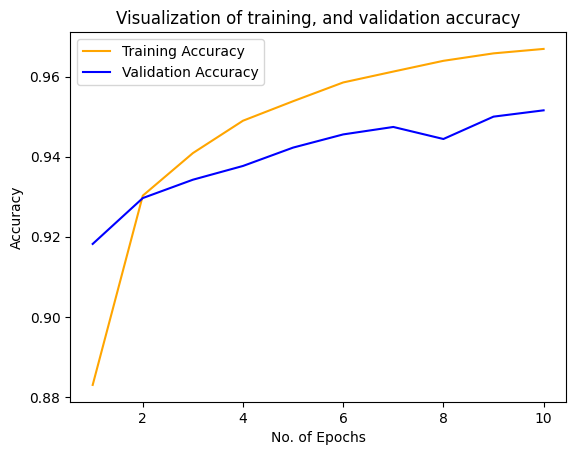

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

epochs=[i for i in range(1,11)]
plt.plot(epochs,history.history['categorical_accuracy'],color='orange',label='Training Accuracy')
plt.plot(epochs,history.history['val_categorical_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of training, and validation accuracy')
plt.legend()
plt.show()
